# “鸢尾花”数据降维 Dimensionality Reduction of "Iris" Dataset

## 数据预览 Data Overview

下面要在非常经典的“鸢尾花”数据集上使用线性判别分析完成降维任务。数据集中含有3 类、共150条鸢尾花基本数据，其中山鸢尾、变色鸢尾、维吉尼亚鸢尾各有50条数据，每条数据包括萼片 长度(单位:厘米)、萼片宽度、花瓣长度、花瓣宽度4种特征。数据集共有150条数据，每条数据有4个特征，现在需要将四维特征降维。

Next, we will use Linear Discriminant Analysis (LDA) to perform dimensionality reduction on the very classic "Iris" dataset. The dataset contains 3 classes with a total of 150 Iris flower data points: 50 each for Setosa, Versicolor, and Virginica. Each data point includes 4 features: sepal length (in cm), sepal width, petal length, and petal width. The dataset has 150 data points, each with 4 features, and we need to reduce these four-dimensional features.

In [1]:
import pandas as pd
# 数据读取，大家也可以先下载下来直接读取
# Read the data, you can also download it and read it directly
df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',',
    )
print(df.head(5))

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 指定列名
# Specify column names
feature_dict = {i:label for i,label in zip(
                  range(5),
                  ('sepal length in cm',
                  'sepal width in cm', 
                  'petal length in cm', 
                  'petal width in cm', 
                  'class label'))} 
df.columns = [l for i,l in sorted(feature_dict.items())]

# 定义数据和标签
# Define data and labels
X = df[['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm']].values
y = df['class label'].values

# 制作标签
# Create labels
feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
label_dict = {1: 'Setosa', 2: 'Versicolor', 3: 'Virginica'}

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

# 查看数据的前几行
# Display the first few rows of data
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 二维原始数据分布 distribution of 2-dimensions of original data

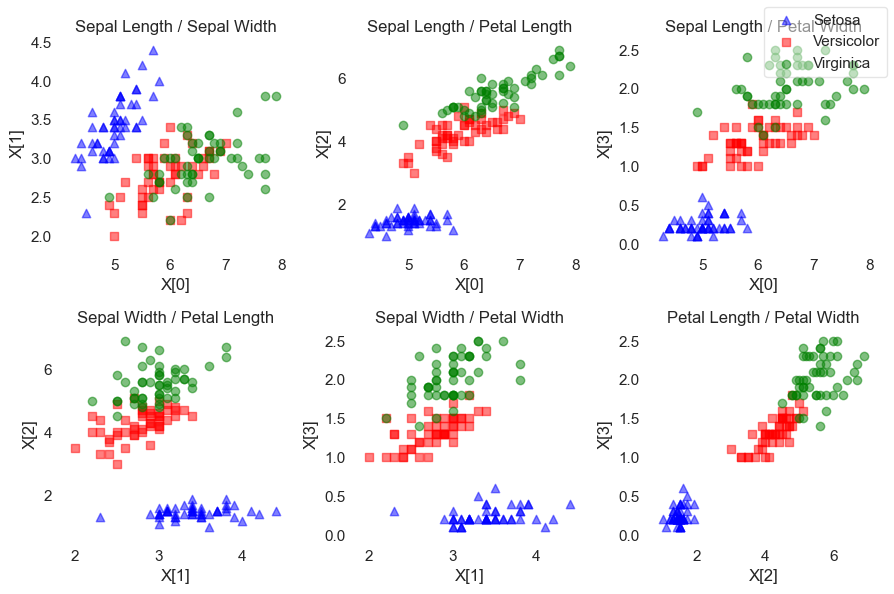

In [80]:
# 假设我们已加载鸢尾花数据集和处理好的特征矩阵 X 和标签 y
# Assume we have already loaded the Iris dataset and processed the feature matrix X and labels y
# 这里 X 是形状为 (150, 4) 的特征矩阵，y 是形状为 (150,) 的标签
# Here, X is a feature matrix of shape (150, 4), and y is the label array of shape (150,)
# label_dict 是类别标签的字典，例如：{1: '山鸢尾', 2: '变色鸢尾', 3: '维吉尼亚鸢尾'}
# label_dict is a dictionary of class labels, e.g., {1: 'Setosa', 2: 'Versicolor', 3: 'Virginica'}

# 可视化展示
# Visualization display
def plot_step_lda(X, y, label_dict):
    feature_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]  # 特征组合 / Feature combinations
    fig, axes = plt.subplots(2, 3, figsize=(9, 6))  # 创建 3x2 的子图 / Create 3x2 subplots
    axes = axes.ravel()  # 将子图数组展平，方便索引 / Flatten the subplot array for easy indexing

    for i, (x_idx, y_idx) in enumerate(feature_pairs):
        ax = axes[i]
        for label, marker, color in zip(range(1, 4), ('^', 's', 'o'), ('blue', 'red', 'green')):
            ax.scatter(x=X[y == label, x_idx],
                       y=X[y == label, y_idx],
                       marker=marker,
                       color=color,
                       alpha=0.5,
                       label=label_dict[label])

        ax.set_xlabel(f'X[{x_idx}]')  # 设置 x 轴标签 / Set x-axis label
        ax.set_ylabel(f'X[{y_idx}]')  # 设置 y 轴标签 / Set y-axis label
        ax.set_title(f'{feature_names[x_idx]} / {feature_names[y_idx]}')

        # 隐藏图的边框线
        # Hide the plot frame lines
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["left"].set_visible(False)

        ax.grid()

    # 添加图例到最后一个子图中
    # Add the legend to the last subplot
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', fancybox=True, framealpha=0.5)

    plt.tight_layout()
    plt.show()

# 调用函数来绘制图像
# Call the function to plot the image
# 假设 X 是你的特征矩阵，y 是类别标签，label_dict 是类别标签的字典
# Assume X is your feature matrix, y is the class labels, and label_dict is the dictionary of class labels
plot_step_lda(X, y, label_dict)

### 一维原始数据分布 distribution of 1-dimension of original data

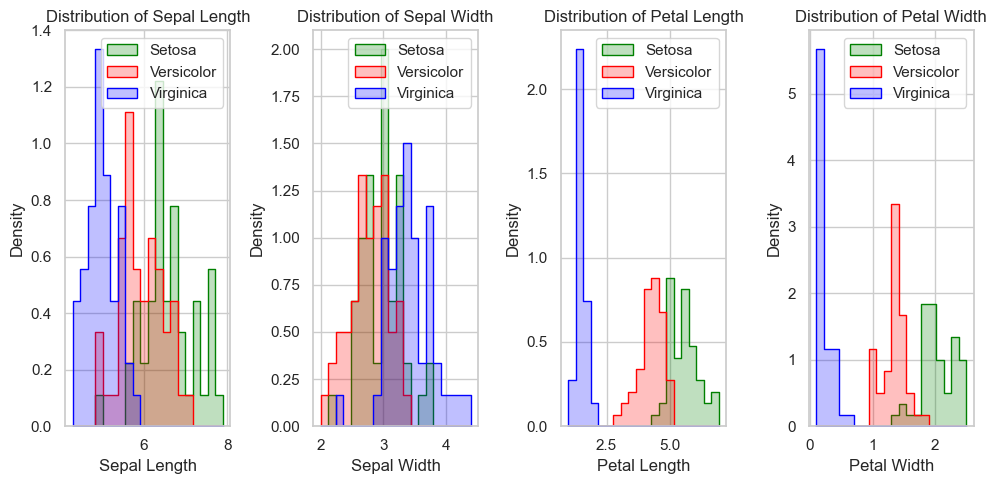

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# 将数据转换为 DataFrame 以便于可视化
# Convert the data to a DataFrame for easier visualization
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y

# 使用 Seaborn 来绘制每个特征的分布图
# Use Seaborn to plot the distribution of each feature
def plot_feature_distributions(df, label_dict):
    # 设置图形风格
    # Set the plot style
    sns.set(style="whitegrid")

    # 创建 1x4 的子图，用于展示 4 个特征的分布
    # Create 1x4 subplots to display the distribution of 4 features
    fig, axes = plt.subplots(1, 4, figsize=(10, 5))
    axes = axes.ravel()  # 将子图展平以便于迭代 / Flatten the subplots for easier iteration

    # 遍历每个特征，绘制每个特征的分布
    # Iterate through each feature and plot its distribution
    for i, ax in enumerate(axes):
        feature = feature_names[i]
        sns.histplot(data=df, x=feature, hue='species', kde=False, ax=ax, palette=['blue', 'red', 'green'],
                     bins=20, element='step', stat='density', common_norm=False)
        ax.set_title(f'Distribution of {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Density')
        # 用类别名称替换标签
        # Replace labels with class names
        ax.legend([label_dict[1], label_dict[2], label_dict[3]])

    plt.tight_layout()
    plt.show()

# 调用函数来绘制图像
# Call the function to plot the images
plot_feature_distributions(df, label_dict)

## 线性判别式分析(Linear Discriminant Analysis, LDA)

### 二维降维数据展示 visualization of 2-dimensions of reduced data

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# 调用包实现LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)
print(X_lda_sklearn.shape)

# 查看特征值
# Check eigenvalues
print("特征值（explained_variance_ratio_）: ", sklearn_lda.explained_variance_ratio_)

# 查看特征向量
# Check eigenvectors
print("特征向量（scalings_）: ", sklearn_lda.scalings_)

(150, 2)
特征值（explained_variance_ratio_）:  [0.99147248 0.00852752]
特征向量（scalings_）:  [[ 0.81926852 -0.03285975]
 [ 1.5478732  -2.15471106]
 [-2.18494056  0.93024679]
 [-2.85385002 -2.8060046 ]]


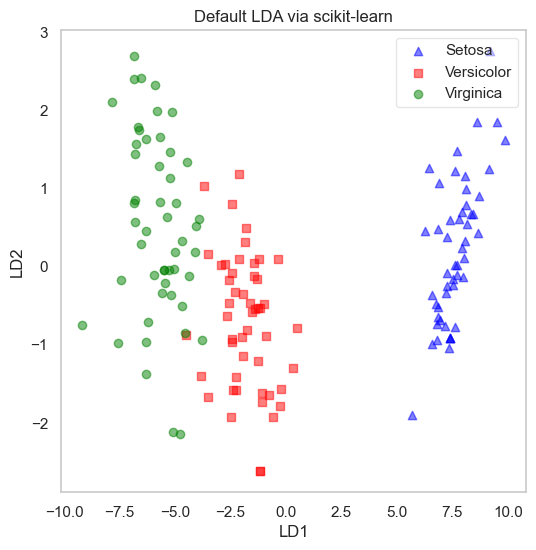

In [6]:
# 绘图降维结果
# draw result of dimensionality reduction
def plot_scikit_lda(X, title):
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1,
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    plt.grid()
    plt.tight_layout
    plt.show()

plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

### 一维降维数据展示 visualization of 1-dimension of reduced data

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# 调用包实现LDA并降到1维  
# Call the package to implement LDA and reduce to 1 dimension
sklearn_lda1 = LDA(n_components=1)
X_lda_sklearn1 = sklearn_lda1.fit_transform(X, y)  # 自动降到1维  
# Automatically reduced to 1 dimension

# 查看降维后的数据形状  
# Check the shape of the data after dimensionality reduction
print("降维后的数据形状: ", X_lda_sklearn1.shape)  # 应该是 (150, 1)  
# Should be (150, 1)

# 查看特征值（解释方差的比例）  
# Check the eigenvalues (explained variance ratio)
print("特征值（explained_variance_ratio_）: ", sklearn_lda1.explained_variance_ratio_)

# 查看特征向量（scalings_）  
# Check the eigenvectors (scalings_)
print("特征向量（scalings_）: ", sklearn_lda1.scalings_)

# 获取第一个线性判别方向的投影向量（第1列）  
# Get the projection vector of the first linear discriminant direction (1st column)
w_first_ld = sklearn_lda1.scalings_[:, 0]

# 将数据投影到第一个线性判别方向  
# Project the data onto the first linear discriminant direction
X_lda1 = X.dot(w_first_ld)

降维后的数据形状:  (150, 1)
特征值（explained_variance_ratio_）:  [0.99147248]
特征向量（scalings_）:  [[ 0.81926852 -0.03285975]
 [ 1.5478732  -2.15471106]
 [-2.18494056  0.93024679]
 [-2.85385002 -2.8060046 ]]


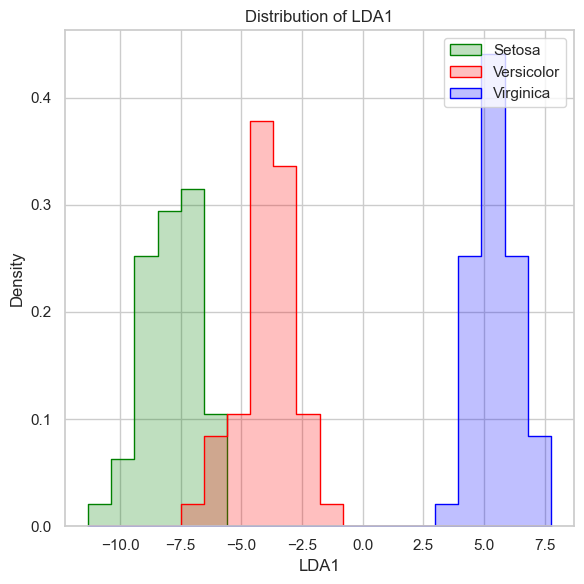

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# 将数据转换为 DataFrame 以便于可视化
# Convert the data to a DataFrame for easier visualization
lda1_feature = 'LDA1'
df1 = pd.DataFrame(X_lda1, columns=[lda1_feature])
df1['species'] = y

# 设置图形风格
# Set the plot style
sns.set(style="whitegrid")

# 创建 1x4 的子图，用于展示 4 个特征的分布
# Create 1x4 subplots to display the distribution of 4 features
plt.figure(figsize=(6, 6))
ax = plt.subplot(111)

# 遍历每个特征，绘制每个特征的分布
# Iterate through each feature and plot its distribution
sns.histplot(data=df1, x=lda1_feature, hue='species', kde=False, ax=ax, palette=['blue', 'red', 'green'],
             bins=20, element='step', stat='density', common_norm=False)
ax.set_title(f'Distribution of {lda1_feature}')
ax.set_xlabel(lda1_feature)
ax.set_ylabel('Density')
# 用类别名称替换标签
# Replace labels with class names
ax.legend([label_dict[1], label_dict[2], label_dict[3]])

plt.tight_layout()
plt.show()

## 主成分分析(Principal Component Analysis, PCA)

### 二维降维数据展示 visualization of 2-dimensions of reduced data

In [41]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print('协方差矩阵 covariance matrix: \n%s' %np.cov(X_std.T))

cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('特征向量 Eigenvectors \n%s' %eig_vecs)  
print('特征值 Eigenvalues \n%s' %eig_vals)  

# 把特征值和特征向量对应起来  
# Pair eigenvalues and eigenvectors
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('特征值和特征向量 Eigenvalues and Eigenvectors')  
# 打印结果  
# Print the results
for eig_pair in (eig_pairs):
    print(f"{eig_pair[0]} -> {eig_pair[1]}")

协方差矩阵 covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
特征向量 Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
特征值 Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]
特征值和特征向量 Eigenvalues and Eigenvectors
2.930353775589317 -> [ 0.52237162 -0.26335492  0.58125401  0.56561105]
0.9274036215173419 -> [-0.37231836 -0.92555649 -0.02109478 -0.06541577]
0.14834222648163944 -> [-0.72101681  0.24203288  0.14089226  0.6338014 ]
0.02074601399559593 -> [ 0.26199559 -0.12413481 -0.80115427  0.52354627]


In [42]:
# 计算累加结果
# calculate sum result
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print (var_exp)
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

[72.77045209380135, 23.03052326768065, 3.683831957627379, 0.5151926808906321]


array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

In [44]:
# 降到2维
# reduce dimensions to 2-dimensions
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', matrix_w)

Y = X_std.dot(matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [55]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

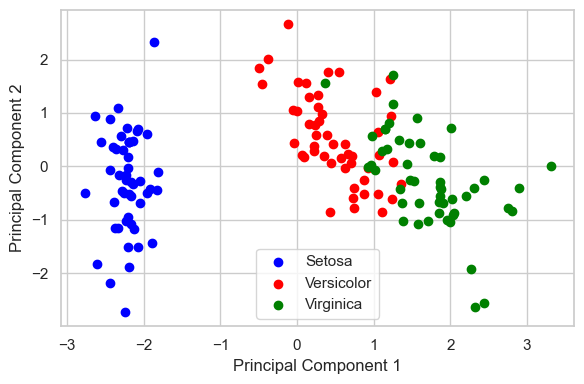

In [58]:
plt.figure(figsize=(6, 4))
for lab, col in zip((1, 2, 3), ('blue', 'red', 'green')):
     plt.scatter(Y[y==lab, 0],
                Y[y==lab, 1],
                label=label_dict[lab],
                c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

### 一维降维数据展示 visualization of 1-dimension of reduced data

In [60]:
# 降到1维
# reduce dimensions to 1-dimension
matrix_w1= np.hstack((eig_pairs[0][1].reshape(4,1)))
print('Matrix1 W:\n', matrix_w1)

Y1 = X_std.dot(matrix_w1)

Matrix1 W:
 [ 0.52237162 -0.26335492  0.58125401  0.56561105]


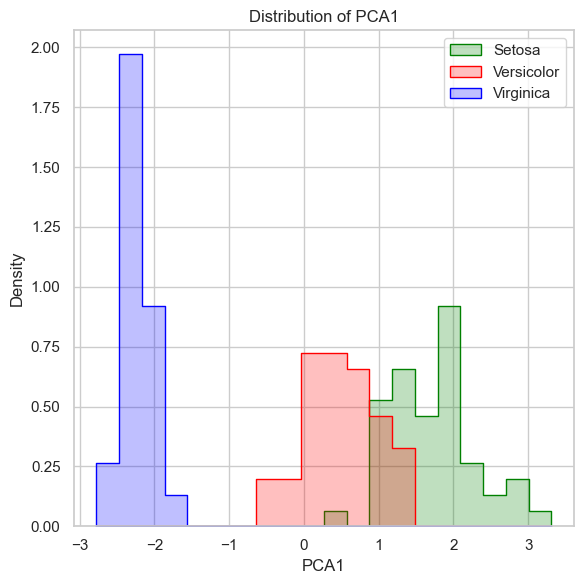

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# 将数据转换为 DataFrame 以便于可视化
# Convert the data to a DataFrame for easier visualization
pca1_feature = 'PCA1'
df2 = pd.DataFrame(Y1, columns=[pca1_feature])
df2['species'] = y

# 设置图形风格
# Set the plot style
sns.set(style="whitegrid")

# 创建 1x4 的子图，用于展示 4 个特征的分布
# Create 1x4 subplots to display the distribution of 4 features
plt.figure(figsize=(6, 6))
ax = plt.subplot(111)

# 遍历每个特征，绘制每个特征的分布
# Iterate through each feature and plot its distribution
sns.histplot(data=df2, x=pca1_feature, hue='species', kde=False, ax=ax, palette=['blue', 'red', 'green'],
             bins=20, element='step', stat='density', common_norm=False)
ax.set_title(f'Distribution of {pca1_feature}')
ax.set_xlabel(pca1_feature)
ax.set_ylabel('Density')
# 用类别名称替换标签
# Replace labels with class names
ax.legend([label_dict[1], label_dict[2], label_dict[3]])

plt.tight_layout()
plt.show()